<a href="https://colab.research.google.com/github/noircir/TensorFlow-Examples/blob/master/TF1_03_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf

In [0]:
np.random.seed(101)
tf.set_random_seed(101)

In [19]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [20]:
rand_b = np.random.uniform(0,100,(5,1))
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [0]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [0]:
# TF will understand that there operations have to be done on matrices (element-wise addition and multiplication)
# Also could have used tf.add and tf.multiply (both element-wise)

add_op = a + b
mul_op = a * b

In [23]:
with tf.Session() as sess:
  add_result = sess.run(add_op, feed_dict={a:rand_a, b:rand_b})
  print(add_result)
  print('\n')

  mul_result = sess.run(mul_op, feed_dict={a:rand_a, b:rand_b})
  print(mul_result)


[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


# Example Neural Network

In [0]:
n_features = 10
n_dense_neurons = 3

In [0]:
# Placeholder for x
x = tf.placeholder(tf.float32,(None,n_features))

In [0]:
# Variables for w and b

W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

b = tf.Variable(tf.zeros([n_dense_neurons]))

** Operation Activation Function **

In [0]:
xW = tf.matmul(x,W) # not element-wise 
z = tf.add(xW,b) # element-wise

# tf.nn.relu() or tf.tanh()
a = tf.sigmoid(z)

** Variable Intializer! **

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a,feed_dict={x : np.random.random([1,n_features])})

In [30]:
print(layer_out)

[[0.25741798 0.00527715 0.0514559 ]]


No cost function yet, so...

# Simple Regression Example

Let's work on a regression example, we are trying to solve a very simple equation:

y = mx + b

y will be the y_labels and x is the x_data. We are trying to figure out the slope and the intercept for the line that best fits our data!

### Artifical Data (Some Made Up Regression Data)

In [42]:
# Equally spaced data with some noise added or subtracted

x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
x_data

array([ 0.58369399,  0.63848141,  1.95939391,  2.55270623,  5.85095237,
        4.92122658,  5.6086015 ,  6.6657991 , 10.22105704,  9.55430279])

In [33]:
np.random.uniform(-1.5,1.5,10)

array([-0.17289561,  1.13276197,  1.34779239, -0.06549775, -0.11664197,
        0.41186709, -0.52617601, -1.14726572, -1.34669701,  0.41297596])

In [40]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
y_label

array([-1.25968938,  1.43275993,  2.61476233,  2.96715913,  2.98416748,
        6.58221379,  6.3214799 ,  7.93277531,  9.52050331, 10.52583655])

In [0]:
import matplotlib.pyplot as plt

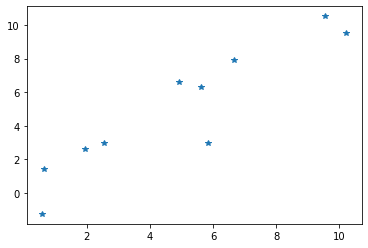

In [43]:
plt.plot(x_data,y_label,'*')

y = mx + b

** Variables **

In [44]:
np.random.rand(2)

array([0.73356761, 0.91388953])

In [0]:
m = tf.Variable(0.39)
b = tf.Variable(0.2)

## Cost Function

In [0]:
error = 0

for x,y in zip(x_data,y_label):
    
    y_hat = m*x + b  # Our predicted value
    
    error += (y-y_hat)**2 # The cost we want to minimize (we'll need to use an optimization function for the minimization!)

## Optimizer

In [48]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Initialize Variables

In [0]:
init = tf.global_variables_initializer()

### Create Session and Run!

In [0]:
with tf.Session() as sess:
    
    sess.run(init)
    
    training_steps = 100
    
    for i in range(training_steps):
        
        sess.run(train)
        

    # Fetch Back Results
    final_slope , final_intercept = sess.run([m,b])

In [57]:
print(final_slope, '\n', final_intercept)

1.0011342 
 0.14997692


## Evaluate results

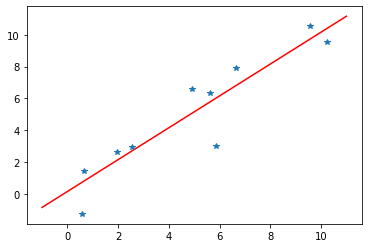

In [56]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')

plt.plot(x_data,y_label,'*')